In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '81f76a35-ca93-4ecc-83e0-9ebc778d27bd',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2025-01-10T20:58:26.654Z', 'error_code': 0, 'error_message': None, 'elapsed': 68, 'credit_count': 1, 'notice': None, 'total_count': 10592}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11860, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'par

In [2]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11860,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.980834e+07,1.980834e+07,False,NaN,1,None,None,None,2025-01-10T20:56:00.000Z,94815.072074,6.577078e+10,8.4195,-0.547162,3.111388,-3.635080,-6.459762,8.934563,50.367105,1.878129e+12,56.8958,1.991117e+12,None,2025-01-10T20:56:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-11 02:28:25.813225
1,1027,Ethereum,ETH,ethereum,9813,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.204866e+08,1.204866e+08,True,NaN,2,None,None,None,2025-01-10T20:57:00.000Z,3264.196367,2.819134e+10,0.2942,-1.041676,2.047747,-9.383475,-14.880433,-2.432968,32.077082,3.932921e+11,11.8986,3.932921e+11,None,2025-01-10T20:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-11 02:28:25.813225
2,825,Tether USDt,USDT,tether,112207,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, ethereum...",NaN,1.374462e+11,1.414371e+11,True,NaN,3,None,None,None,2025-01-10T20:57:00.000Z,1.000151,1.244864e+11,2.4118,0.018846,0.030061,0.040815,-0.093316,-0.177598,0.035323,1.374670e+11,4.1644,1.414585e+11,None,2025-01-10T20:57:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-01-11 02:28:25.813225
3,52,XRP,XRP,xrp,1499,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.744905e+10,9.998671e+10,False,NaN,4,None,None,None,2025-01-10T20:57:00.000Z,2.362745,5.454486e+09,-16.6508,0.410220,3.792734,-3.611513,-2.170287,279.603523,339.254382,1.357374e+11,4.1120,2.362745e+11,None,2025-01-10T20:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-11 02:28:25.813225
4,1839,BNB,BNB,bnb,2330,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.440063e+08,1.440063e+08,False,NaN,5,None,None,None,2025-01-10T20:57:00.000Z,691.830582,1.719516e+09,-9.7404,-0.342245,1.981159,-2.833845,-2.092199,8.319975,19.827138,9.962796e+10,3.0181,9.962796e+10,None,2025-01-10T20:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-11 02:28:25.813225
5,5426,Solana,SOL,solana,820,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.837391e+08,5.918617e+08,True,NaN,6,None,None,None,2025-01-10T20:57:00.000Z,187.671612,3.906545e+09,4.1097,-1.240105,1.650188,-13.152075,-18.067295,-14.519462,27.885758,9.078410e+10,2.7466,1.110756e+11,None,2025-01-10T20:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-11 02:28:25.813225
6,74,Dogecoin,DOGE,dogecoin,1143,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.475698e+11,1.475698e+11,True,NaN,7,None,None,None,2025-01-10T20:57:00.000Z,0.333446,3.374966e+09,-7.1725,-0.517348,4.961807,-11.508113,-19.796600,2.407237,198.940588,4.920656e+10,1.4907,4.920656e+10,None,2025-01-10T20:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-11 02:28:25.813225
7,3408,USDC,USDC,usd-coin,24629,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,4.568381e+10,4.568381e+10,False,NaN,8,None,None,None,2025-01-10T20:57:00.000Z,1.000124,8.295238e+09,0.1120,0.019991,0.015879,0.008297,0.006646,-0.003065,0.019599,4.568949e+10,1.3841,4.568949e+10,None,2025-01-10T20:57:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-01-11 02:28:25.813225
8,2010,Cardano,ADA,cardano,1431,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract..."

In [4]:
#defining a function for the script to run
def api_runner(): 
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '81f76a35-ca93-4ecc-83e0-9ebc778d27bd',
    }
    
    session = Session()
    session.headers.update(headers)
    
    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
        
    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')

    if not os.path.isfile(r'C:\Users\gshek\OneDrive\Documents\Data Analysis\API Runner\API.csv'):
        df.to_csv(r'C:\Users\gshek\OneDrive\Documents\Data Analysis\API Runner\API.csv', header = 'column_names', index = True)
    else:
        df.to_csv(r'C:\Users\gshek\OneDrive\Documents\Data Analysis\API Runner\API.csv', mode = 'a', header = False, index = True)

In [5]:
import os
from time import time
from time import sleep
for i in range(333):
    api_runner()
    print('API run completed successfully')
    sleep(60) #sleep for 1 miniute or 60 seconds
exit()

API run completed successfully
API run completed successfully
API run completed successfully
API run completed successfully
API run completed successfully
API run completed successfully


KeyboardInterrupt: 

In [11]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [13]:
df84 = pd.read_csv(r'C:\Users\gshek\OneDrive\Documents\Data Analysis\API Runner\API.csv', index_col = 0)
df84

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11860,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19808337.00000,19808337.00000,False,NaN,1,NaN,NaN,NaN,2025-01-10T20:56:00.000Z,94815.07207,65770779122.11800,8.41950,-0.54716,3.11139,-3.63508,-6.45976,8.93456,50.36711,1878128900322.88647,56.89580,1991116513555.90991,NaN,2025-01-10T20:56:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-11 02:28:26.872308
1,1027,Ethereum,ETH,ethereum,9813,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120486642.02380,120486642.02380,True,NaN,2,NaN,NaN,NaN,2025-01-10T20:57:00.000Z,3264.19637,28191338509.78188,0.29420,-1.04168,2.04775,-9.38348,-14.88043,-2.43297,32.07708,393292059155.47522,11.89860,393292059155.47998,NaN,2025-01-10T20:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-11 02:28:26.872308
2,825,Tether USDt,USDT,tether,112207,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'eth...",NaN,137446161140.60562,141437091578.24875,True,NaN,3,NaN,NaN,NaN,2025-01-10T20:57:00.000Z,1.00015,124486433620.29834,2.41180,0.01885,0.03006,0.04081,-0.09332,-0.17760,0.03532,137466954409.73267,4.16440,141458488607.35001,NaN,2025-01-10T20:57:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-01-11 02:28:26.872308
3,52,XRP,XRP,xrp,1499,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,57449049415.00000,99986708632.00000,False,NaN,4,NaN,NaN,NaN,2025-01-10T20:57:00.000Z,2.36274,5454486175.80168,-16.65080,0.41022,3.79273,-3.61151,-2.17029,279.60352,339.25438,135737442836.54744,4.11200,236274480115.42999,NaN,2025-01-10T20:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-11 02:28:26.872308
4,1839,BNB,BNB,bnb,2330,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,144006298.91000,144006298.91000,False,NaN,5,NaN,NaN,NaN,2025-01-10T20:57:00.000Z,691.83058,1719516369.16466,-9.74040,-0.34224,1.98116,-2.83385,-2.09220,8.31998,19.82714,99627961651.62927,3.01810,99627961651.63000,NaN,2025-01-10T20:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-11 02:28:26.872308
5,5426,Solana,SOL,solana,820,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,483739096.57948,591861739.35321,True,NaN,6,NaN,NaN,NaN,2025-01-10T20:57:00.000Z,187.67161,3906544809.14077,4.10970,-1.24010,1.65019,-13.15207,-18.06729,-14.51946,27.88576,90784096222.20663,2.74660,111075646925.42000,NaN,2025-01-10T20:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-11 02:28:26.872308
6,74,Dogecoin,DOGE,dogecoin,1143,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,147569836383.70523,147569836383.70523,True,NaN,7,NaN,NaN,NaN,2025-01-10T20:57:00.000Z,0.33345,3374965759.86103,-7.17250,-0.51735,4.96181,-11.50811,-19.79660,2.40724,198.94059,49206562128.05675,1.49070,49206562128.06000,NaN,2025-01-10T20:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-11 02:28:26.872308
7,3408,USDC,USDC,usd-coin,24629,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,45683813846.33135,45683813846.33135,False,NaN,8,NaN,NaN,NaN,2025-01-10T20:57:00.000Z,1.00012,8295237639.01700,0.11200,0.01999,0.01588,0.00830,0.00665,-0.00306,0.01960,45689488108.38132,1.38410,45689488108.38000,NaN,2025-01-10T20:57:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb4

In [19]:
df_grouped = df84.groupby('name', sort = False)[['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d']].mean()

In [23]:
df_stack = df_grouped.stack()
df_stack

name                                     
Bitcoin      quote.USD.percent_change_1h     -0.59195
             quote.USD.percent_change_24h     2.95482
             quote.USD.percent_change_7d     -3.64230
             quote.USD.percent_change_30d    -6.49502
             quote.USD.percent_change_60d     8.96827
             quote.USD.percent_change_90d    50.26312
Ethereum     quote.USD.percent_change_1h     -0.93807
             quote.USD.percent_change_24h     2.06162
             quote.USD.percent_change_7d     -9.32023
             quote.USD.percent_change_30d   -14.91943
             quote.USD.percent_change_60d    -2.49909
             quote.USD.percent_change_90d    32.09056
Tether USDt  quote.USD.percent_change_1h     -0.00649
             quote.USD.percent_change_24h     0.03155
             quote.USD.percent_change_7d      0.03318
             quote.USD.percent_change_30d    -0.09399
             quote.USD.percent_change_60d    -0.15139
             quote.USD.percent_change_90

In [47]:
df_stack2 = df_stack.to_frame(name = 'values')
df_stack2

values
name                                              
Bitcoin     quote.USD.percent_change_1h   -0.59195
            quote.USD.percent_change_24h   2.95482
            quote.USD.percent_change_7d   -3.64230
            quote.USD.percent_change_30d  -6.49502
            quote.USD.percent_change_60d   8.96827
            quote.USD.percent_change_90d  50.26312
Ethereum    quote.USD.percent_change_1h   -0.93807
            quote.USD.percent_change_24h   2.06162
            quote.USD.percent_change_7d   -9.32023
            quote.USD.percent_change_30d -14.91943
            quote.USD.percent_change_60d  -2.49909
            quote.USD.percent_change_90d  32.09056
Tether USDt quote.USD.percent_change_1h   -0.00649
            quote.USD.percent_change_24h   0.03155
            quote.USD.percent_change_7d    0.03318
            quote.USD.percent_change_30d  -0.09399
            quote.USD.percent_change_60d  -0.15139
            quote.USD.percent_change_90d   0.03959
XRP         quote.USD.percent_change_1h    0.12399
            quote.USD.percent_change_24h   3.53498
            quote.USD.percent_change_7d   -3.66106
            quote.USD.percent_change_30d  -2.25779
            quote.USD.percent_change_60d 280.27542
            quote.USD.percent_change_90d 338.64894
BNB         quote.USD.percent_change_1h   -0.36687
            quote.USD.percent_change_24h   1.78865
            quote.USD.percent_change_7d   -2.83859
            quote.USD.percent_change_30d  -2.15452
            quote.USD.percent_change_60d   8.32542
            quote.USD.percent_change_90d  19.81260
Solana      quote.USD.percent_change_1h   -1.31267
            quote.USD.percent_change_24h   1.32597
            quote.USD.percent_change_7d  -13.16726
            quote.USD.percent_change_30d -18.11445
            quote.USD.percent_change_60d -14.39823
            quote.USD.percent_change_90d  27.84400
Dogecoin    quote.USD.percent_change_1h   -0.51793
            quote.USD.percent_change_24h   4.88061
            quote.USD.percent_change_7d  -11.54029
            quote.USD.percent_change_30d -19.90110
            quote.USD.percent_change_60d   3.00361
            quote.USD.percent_change_90d 198.91559
USDC        quote.USD.percent_change_1h    0.00334
            quote.USD.percent_change_24h   0.01125
            quote.USD.percent_change_7d    0.00194
            quote.USD.percent_change_30d   0.01642
            quote.USD.percent_change_60d   0.02266
            quote.USD.percent_change_90d   0.01889
Cardano     quote.USD.percent_change_1h   -0.84162
            quote.USD.percent_change_24h   3.92935
            quote.USD.percent_change_7d  -16.11279
            quote.USD.percent_change_30d -13.76469
            quote.USD.percent_change_60d  53.57877
            quote.USD.percent_change_90d 164.86747
TRON        quote.USD.percent_change_1h   -0.17864
            quote.USD.percent_change_24h   2.35961
            quote.USD.percent_change_7d   -9.46598
            quote.USD.percent_change_30d -12.79056
            quote.USD.percent_change_60d  45.85967
            quote.USD.percent_change_90d  49.90921
Sui         quote.USD.percent_change_1h   -0.54594
            quote.USD.percent_change_24h  10.24501
            quote.USD.percent_change_7d    7.39671
            quote.USD.percent_change_30d  20.38766
            quote.USD.percent_change_60d  60.36524
            quote.USD.percent_change_90d 130.86267
Avalanche   quote.USD.percent_change_1h   -0.73038
            quote.USD.percent_change_24h   1.57741
            quote.USD.percent_change_7d  -11.68191
            quote.USD.percent_change_30d -23.40397
            quote.USD.percent_change_60d   6.95800
            quote.USD.percent_change_90d  27.48258
Toncoin     quote.USD.percent_change_1h   -0.11839
            quote.USD.percent_change_24h   3.56245
            quote.USD.percent_change_7d   -8.01871
            quote.USD.percent_change_30d -15.54612
            quote.USD.percent_change_60d  -1.55393
            quo

In [51]:
index = pd.Index(range(len(df_stack2)))
df_stack3 = df_stack2.reset_index()
df_stack3

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.59195
1,Bitcoin,quote.USD.percent_change_24h,2.95482
2,Bitcoin,quote.USD.percent_change_7d,-3.64230
3,Bitcoin,quote.USD.percent_change_30d,-6.49502
4,Bitcoin,quote.USD.percent_change_60d,8.96827
5,Bitcoin,quote.USD.percent_change_90d,50.26312
6,Ethereum,quote.USD.percent_change_1h,-0.93807
7,Ethereum,quote.USD.percent_change_24h,2.06162
8,Ethereum,quote.USD.percent_change_7d,-9.32023
9,Ethereum,quote.USD.percent_change_30d,-14.91943


In [55]:
df_stack4 = df_stack3.rename(columns = {'level_1' : 'percent_changed'})
df_stack4

,name,percent_changed,values
0,Bitcoin,quote.USD.percent_change_1h,-0.59195
1,Bitcoin,quote.USD.percent_change_24h,2.95482
2,Bitcoin,quote.USD.percent_change_7d,-3.64230
3,Bitcoin,quote.USD.percent_change_30d,-6.49502
4,Bitcoin,quote.USD.percent_change_60d,8.96827
5,Bitcoin,quote.USD.percent_change_90d,50.26312
6,Ethereum,quote.USD.percent_change_1h,-0.93807
7,Ethereum,quote.USD.percent_change_24h,2.06162
8,Ethereum,quote.USD.percent_change_7d,-9.32023
9,Ethereum,quote.USD.percent_change_30d,-14.91943


In [61]:
df_stack4['percent_changed'] = df_stack4['percent_changed'].replace(['quote.USD.percent_change_1h'], ['1h'])
df_stack4['percent_changed'] = df_stack4['percent_changed'].replace(['quote.USD.percent_change_24h'], ['24h'])
df_stack4['percent_changed'] = df_stack4['percent_changed'].replace(['quote.USD.percent_change_7d'], ['7d'])
df_stack4['percent_changed'] = df_stack4['percent_changed'].replace(['quote.USD.percent_change_30d'], ['30d'])
df_stack4['percent_changed'] = df_stack4['percent_changed'].replace(['quote.USD.percent_change_60d'], ['60d'])
df_stack4['percent_changed'] = df_stack4['percent_changed'].replace(['quote.USD.percent_change_90d'], ['90d'])
df_stack4

,name,percent_changed,values
0,Bitcoin,1h,-0.59195
1,Bitcoin,24h,2.95482
2,Bitcoin,7d,-3.64230
3,Bitcoin,30d,-6.49502
4,Bitcoin,60d,8.96827
5,Bitcoin,90d,50.26312
6,Ethereum,1h,-0.93807
7,Ethereum,24h,2.06162
8,Ethereum,7d,-9.32023
9,Ethereum,30d,-14.91943


In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

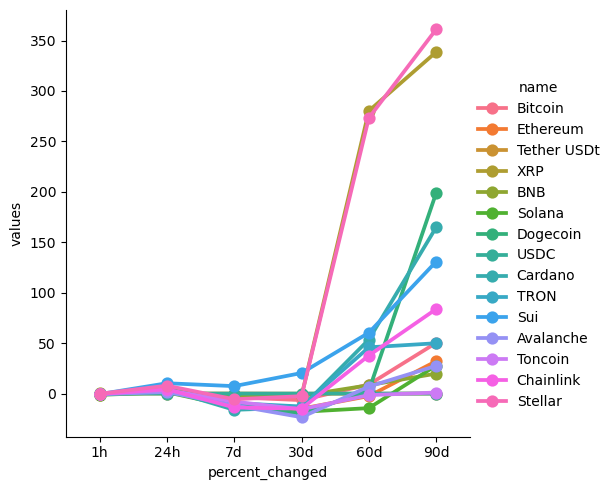

In [71]:
sns.catplot(x = 'percent_changed', y = 'values', hue = 'name', data = df_stack4, kind = 'point')
#simple visualisation of the recently curated data

In [75]:
df_bit = df84[['name', 'quote.USD.price', 'timestamp']]
df_bit = df_bit.query("name == 'Bitcoin'")
df_bit

,name,quote.USD.price,timestamp
0,Bitcoin,94815.07207,2025-01-11 02:28:26.872308
0,Bitcoin,94830.41507,2025-01-11 02:29:28.154168
0,Bitcoin,94830.41507,2025-01-11 02:30:29.460297
0,Bitcoin,94674.34739,2025-01-11 02:31:30.698647
0,Bitcoin,94644.28782,2025-01-11 02:32:35.340356
0,Bitcoin,94643.28565,2025-01-11 02:33:36.685992


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

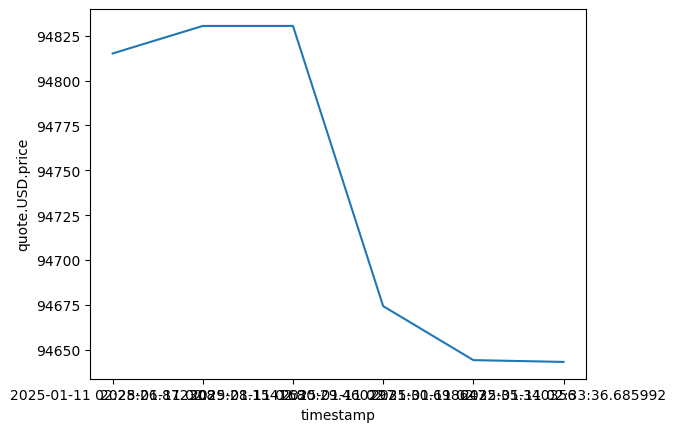

In [79]:
sns.lineplot(x = 'timestamp', y = 'quote.USD.price', data = df_bit)